<a href="https://colab.research.google.com/github/blackJJW/DL/blob/main/self_study_DL/chapter8_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 08-3 합성곱 신경망의 시각화

## 가중치 시각화

- 합성곱 층은 여러 개의 필터를 사용해 이미지에서 특징을 학습
- 각 필터는 커널이라는 가중치와 절편을 가지고 있음
- 일반적으로 절편은 시각적으로 의미가 없음
- 가중치는 입력 이미지의 2차원 영역에 적용되어 어떤 특징을 크게 두드러지게 표현하는 역할

In [1]:
from tensorflow import keras
model = keras.models.load_model('best-cnn-model.h5')

In [2]:
model.layers

- model.layers 리스트에 이전 절에서 추가했던 Conv2D, MaxPooling2D 층이 번갈아 2번 연속 등장
- 그 다음 Flatten 층과 Dense 층, Dropout 층이 차례대로 등장
- 마지막에 Dense 출력층이 놓여있음

- 첫 번째 합성곱 층의 가중치
  - 층의 가중치와 절편은 층의 weights 속성에 저장
  

In [4]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


- 합성곱 층에 전달되는 입력의 깊이가 1이므로 실제 커널의 크기는 (3, 3, 1)
- 필터 개수가 32개이므로 weights의 첫 번째 원소인 가중치의 크기는 (3, 3, 1, 32)가 됨
- weights의 두 번째 원소는 절편의 개수를 나타냄
- 필터마다 1개의 절편이 있으므로 (32,) 크기가 됨 

- weights 속성은 텐서플로의 다차원 배열인 Tensor 클래스의 객체
- 여기서는 넘파이 배열로 변환

In [5]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.028283767 0.24100564


- 이 가중치의 평균값은 0에 가깝고, 표준편차는 0.24 정도

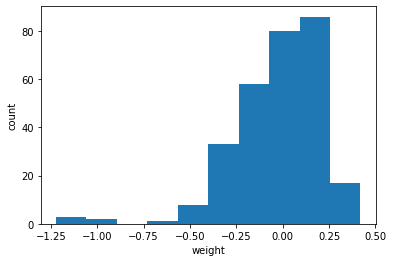

In [6]:
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

- 맷플롯립의 hist() 함수에 히스토그램을 그리기 위해 1차원 배열로 전달
- reshape() 메서드로 conv_weights 배열을 1개의 열이 있는 배열로 변환

- 이번에는 32개의 커널을 16개씩 두 줄에 출력

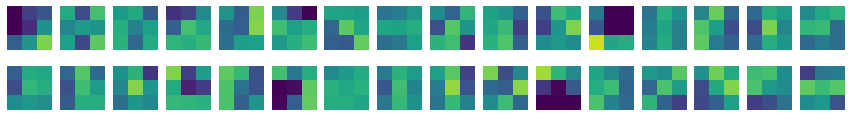

In [7]:
fig, axs = plt.subplots(2, 16, figsize=(15, 2))
for i in range(2):
  for j in range(16):
    axs[i, j].imshow(conv_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
    axs[i, j].axis('off')
plt.show()

- conv_weights에 32개의 가중치를 저장
- 이 배열의 마지막 차원을 순회하면서 0부터 i*16 + j번째까지의 가중치 값을 차례대로 출력
- i는 행 인덱스, j는 열 인덱스
- conv_weights[:,:,0,0]에서 conv_weights[:,:,0,31]까지 출력

- imshow() 함수는 배열에 있는 최댓값과 최솟값을 사용해 픽셀의 강도를 표현
  - 그 배열의 최댓값이면 가장 밝은 노란색을 그림
  

- 이번에는 훈련하지 않는 빈 합성곱 신경망을 생성
- 이 합성곱 층의 가중치가 위에서 본 훈련한 가중치와 어떻게 다른지 그림으로 비교
- 먼저 Sequential 클래스로 모델을 만들고 Conv2D 층을 하나 추가

In [8]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                                          padding='same', input_shape=(28, 28, 1)))

- 이 모델의 첫 번째 층 (Conv2D 층)의 가중치를 no_training_conv 변수에 저장

In [9]:
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [10]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

-0.003443989 0.081783295


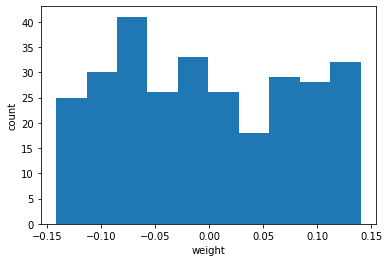

In [11]:
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

- 그래프가 이전과 달라진 이유는 텐서플로가 신경망의 가중치를 처음 초기화할 때 균등 분포에서 랜덤하게 값을 선택하기 때문


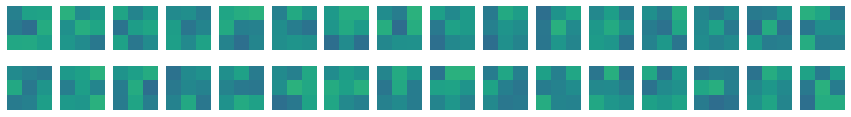

In [12]:
fig, axs = plt.subplots(2, 16, figsize=(15, 2))
for i in range(2):
  for j in range(16):
    axs[i, j].imshow(no_training_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
    axs[i, j].axis('off')
plt.show()

- 가중치가 밋밋하게 초기화됨

## 함수형 API

- 함수형 API(fucntional API)는 케라스의 Model 클래스를 사용하여 모델을 만듬
- Dense 층 2개로 이루어진 완전 연결 신경망을 함수형 API로 구현


```
dense1 = keras.layers.Dense(100, activation = 'sigmoid')
dense2 = keras.layers.Dense(10, activation = 'softmax')
```



- 이 객체를 Sequential 클래스 객체의 add() 메서드에 전달 가능
- 하지만 다음과 같이 함수처럼 호출 가능


```
hidden = dense1(inputs)
```



- 두 번째 층 호출


```
outputs = dense2(hidden)
```



- inputs와 outputs을 Model 클래스로 연결

```
model = keras.Model(inputs, outputs)
```



- 입력에서 출력까지 층을 호출한 결과를 계속 이어주고 Model 클래스에 입력과 최종 출력을 지정
- Sequential 클래스는 InputLayer 클래스를 자동으로 추가하고 호출해 주지만 Model 클래스에서는 수동으로 만드러서 호출해야함
  - inputs는 InputLayer 클래스의 출력값

- 케라스는 InputLayer 클래스 객체를 쉽게 다룰수 있도록 Input() 함수를 별도로 제공
- 입력의 크기를 지정하는 shape 매개변수와 함께 이 함수를 호출하면 InputLayer 클래스 객체를 만들어 출력을 반환

```
inputs = keras.Input(shape=(784,))
```



- model 객체 순서   
model 객체 - InputLayer -> Conv2D -> MaxPooling2D -> Conv2D -> MaxPooling2D -> Flatten -> Dense -> Dropout -> Dense 

- 필요한 것은 첫 번째 Conv2D의 출력
- model 객체의 입려과 Conv2D의 출력을 알 수 있다면 이 둘을 연결하여 새로운 모델을 얻을 수 있음
- model 객체의 predict() 메서드를 호출하면 입력부터 마지막 층까지 모든 계산을 수행한 후 최종 출력을 반환
- 첫 번째 Conv2D의 출력 : model.layers[0].output
- model 객체의 입력 : model.input

In [13]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


- model.input 과 model.layers[0].output 을 연결하는 새로운 conv_acti 모델 생성 가능

In [14]:
conv_acti = keras.Model(model.input, model.layers[0].output)

- model 객체의 predict() 메서드를 호출하면 최종 출력층의 확률을 반환
- conv_acti의 predict() 메서드를 호출하면 첫 번째 Conv2D의 출력을 반환

## 특성 맵 시각화

4431872/4422102 [==============================] - 0s 0us/step


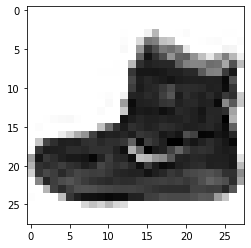

In [15]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

- 이 샘플을 conv_acti 모델에 주입하여 Conv2D 층이 만드는 특성 맵을 출력
- predict() 메서드는 항상 입력의 첫 번째 차원이 배치 차원일 것을 기대
- 하나의 샘플을 전달하더라도 꼭 첫 번째 차원을 유지해야 함
  - 이를 위해 슬라이싱 연산자를 사용해 첫 번째 샘플을 선택
  - 그 다음 (784,) 크기를 (28, 28, 1) 크기로 변경하고 255로 나눔

In [16]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv_acti.predict(inputs)

In [17]:
print(feature_maps.shape)

(1, 28, 28, 32)


- 세임 패딩과 32개의 필터를 사용한 합성곱 층의 출력이므로 (28, 28, 32)
- 첫 번째 차원은 배치 차원
- 샘플을 하나 입력했기 때문에 1

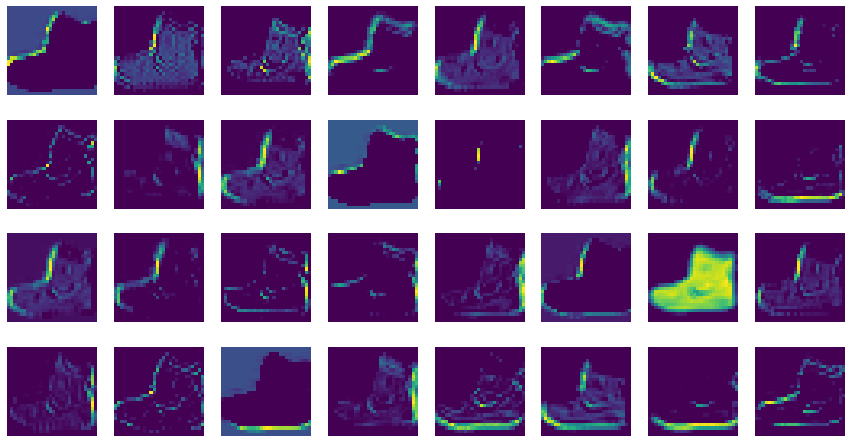

In [19]:
fig, axs = plt.subplots(4, 8, figsize=(15, 8))
for i in range(4):
  for j in range(8):
    axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
    axs[i, j].axis('off')
plt.show()

- 이 특성 맵은 32개의 필터로 인해 입력 이미지에서 강하게 활성화된 부분을 보여줌


- 두 번째 합성곱 층이 만든 특성 맵도 같은 방식으로 확인 가능
- 먼저 model 객체의 입력과 두 번째 합성곱 층인 model.layers[2]의 출력을 연결한 conv2_acti 모델을 생성

In [20]:
conv2_acti = keras.Model(model.input, model.layers[2].output)

- 첫 번째 샘플을 conv2_acti 모델의 predict()메서드에 전달

In [21]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv2_acti.predict(inputs)

- 첫 번째 풀링 층에서 가로세로 크기가 절반으로 줄었고, 두 번째 합성곱 층의 필터 개수는 64개이므로 feature_maps의 크기는 배치 차원을 제외하면 (14, 14, 64)일 것

In [22]:
print(feature_maps.shape)

(1, 14, 14, 64)


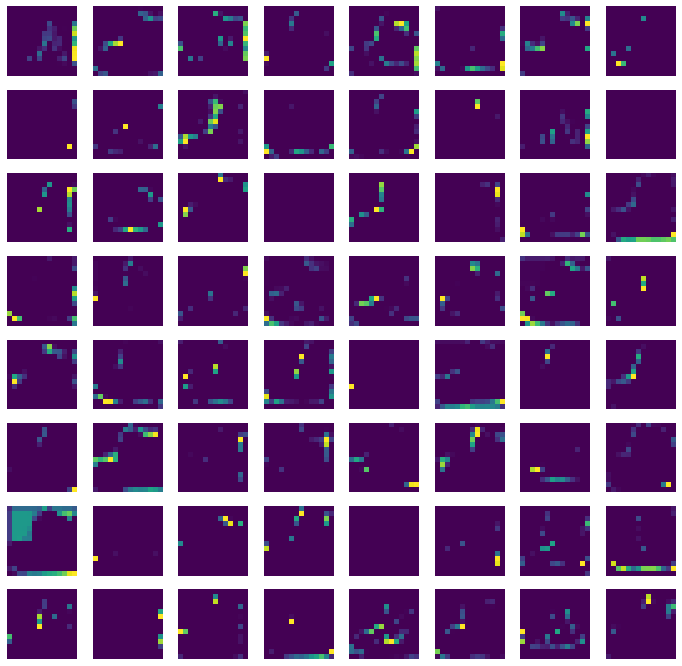

In [23]:
fig, axs = plt.subplots(8, 8, figsize=(12, 12))
for i in range(8):
  for j in range(8):
    axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
    axs[i, j].axis('off')
plt.show()

- 두 번째 합성곱 층의 필터 크기는 (3, 3, 32)
- 두 번째 합성곱 층의 첫 번째 필터가 앞서 출력한 32개의 특성 맵과 곱해져 두 번째 합성곱 층의 첫 번째 특성 맵이 됨
- (14, 14, 32) 특성 맵에서 어떤 부위를 감지하는지 직관적으로 이해하기가 어려움
- 이런 현상은 합성곱 층을 많이 쌓을수록 심해짐

- 합성곱 신경망의 앞부분에 있는 합성곱 층은 이미지의 시각적인 정보를 감지하고 뒤쪽에 있는 합성곱 층은 앞쪽에서 감지한 시각적인 정보를 바탕으로 추상적인 정보를 학습함

## 마무리

### 키워드로 끝내는 핵심 포인트

> 가중치 시각화 : 합성곱 층의 가중치를 이미지로 출력하는 것.
- 합성곱 신경망은 주로 이미지를 다루기 때문에 가중치가 시각적인 패턴을 학습하는지 알아볼 수 있음   

> 특성 맵 시각화 : 합성곱 층의 활성화 출력을 이미지로 그리는 것
- 가중치 시각화와 함께 비교하여 각 필터가 이미지의 어느 부분을 활성화시키는지 확인 가능
   
> 함수형 API : 케라스에서 신경망 모델을 마드는 방법 중 하나
- Model 클래스에 모델의 입려과 출력을 지정.
- 전형적으로 입력은 Input() 함수를 사용하여 정의하고 출력은 마지막 층의 출력으로 정의

### 핵심 패키지와 함수

> TensorFlow
- Model : 케라스 모델을 만드는 클래스
  - 첫 번째 매개변수인 inputs에 모델의 입력 또는 입력의 리스트를 지정
  - 두 번째 매개변수인 outputs에 모델의 출력 또는 출력의 리스트를 지정
  - name 매개변수에 모델의 이름을 지정 가능